<a href="https://colab.research.google.com/github/MrYousri97/Spark-Intern/blob/main/Iris_NumberOfCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means clustering
## import Libraries

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

## Reading data

In [3]:
iris=datasets.load_iris()
data= pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Elbow method

In [5]:
from sklearn.cluster import KMeans
x=data.iloc[:,:].values
WCSS=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

## Plotting Elbow method


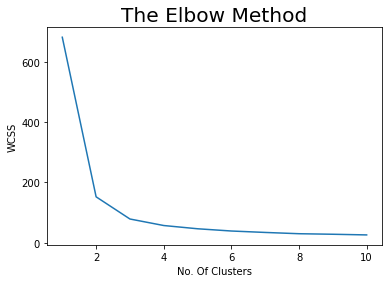

In [6]:
plt.plot(range(1,11),WCSS)
plt.style.use("fivethirtyeight")
plt.title('The Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()


we see that 3 is optimal number to be number of clusters

## Applying K-Means to dataset

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

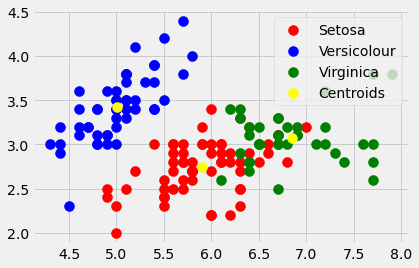

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()